# Single Perceptron

Given a single neuron, can I separate binary classification points?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First lets create a simple dataset that can be easily separated with a line to classify 100% of the points.

In [45]:
np.random.seed(0)
N = 50
data_blob1 = np.random.randn(N//2, 2)
data_blob2 = np.random.randn(N//2, 2) - 5

X = np.vstack((data_blob1, data_blob2))
# Label the first blob as 1 and the second blob as 0
labels = np.vstack((np.ones((N//2,1)), np.zeros((N//2,1))))

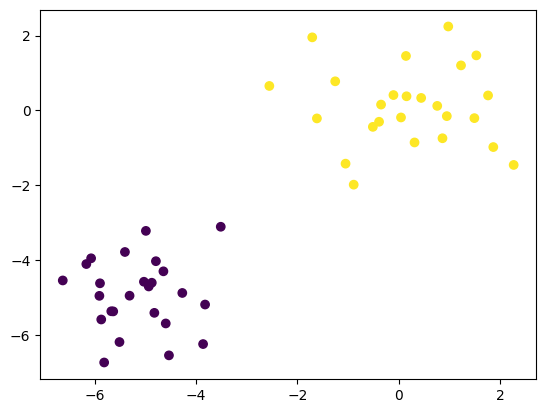

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=labels)